# PRJNA1042787 - Liponnen et al.

Article link: [https://www.nature.com/articles/s41598-024-58113-8](https://www.nature.com/articles/s41598-024-58113-8).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA1042787"
lineages_in_paper <- c("BA.1", "BA.2", "BA.3", "B.1.617.2")


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,22204,+22205.GAGCCAGAA,ins:22205:9,0.9477611940,5360,5080,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
2,25699,+25700.CCCCCC,ins:25700:6,0.0000000000,35018,0,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
3,25703,+25704.CCCCCT,ins:25704:6,0.0000000000,35015,0,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
4,11074,-11075.1,del:11075:1,0.0338873464,26293,891,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
5,11082,-11083.1,del:11083:1,0.0002282931,26282,6,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
6,11282,-11283.9,del:11283:9,0.9147274381,18693,17099,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  4 90

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  0.309   0.008   0.320 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,2.683938e-02,NA,NA,BA.2,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
2,8.170954e-03,NA,NA,BA.3,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
3,9.243511e-01,NA,NA,BA.1,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
4,3.513765e-02,NA,NA,B.1.617.2,SRR26876975,2022-01-17,Viikinmaki_17012022_dil1-5,502,781146136,PRJNA1042787,860000
5,6.188231e-03,NA,NA,BA.2,SRR26876976,2022-01-10,Viikinmaki_10012022,502,182077910,PRJNA1042787,860000
6,6.952843e-09,NA,NA,BA.3,SRR26876976,2022-01-10,Viikinmaki_10012022,502,182077910,PRJNA1042787,860000


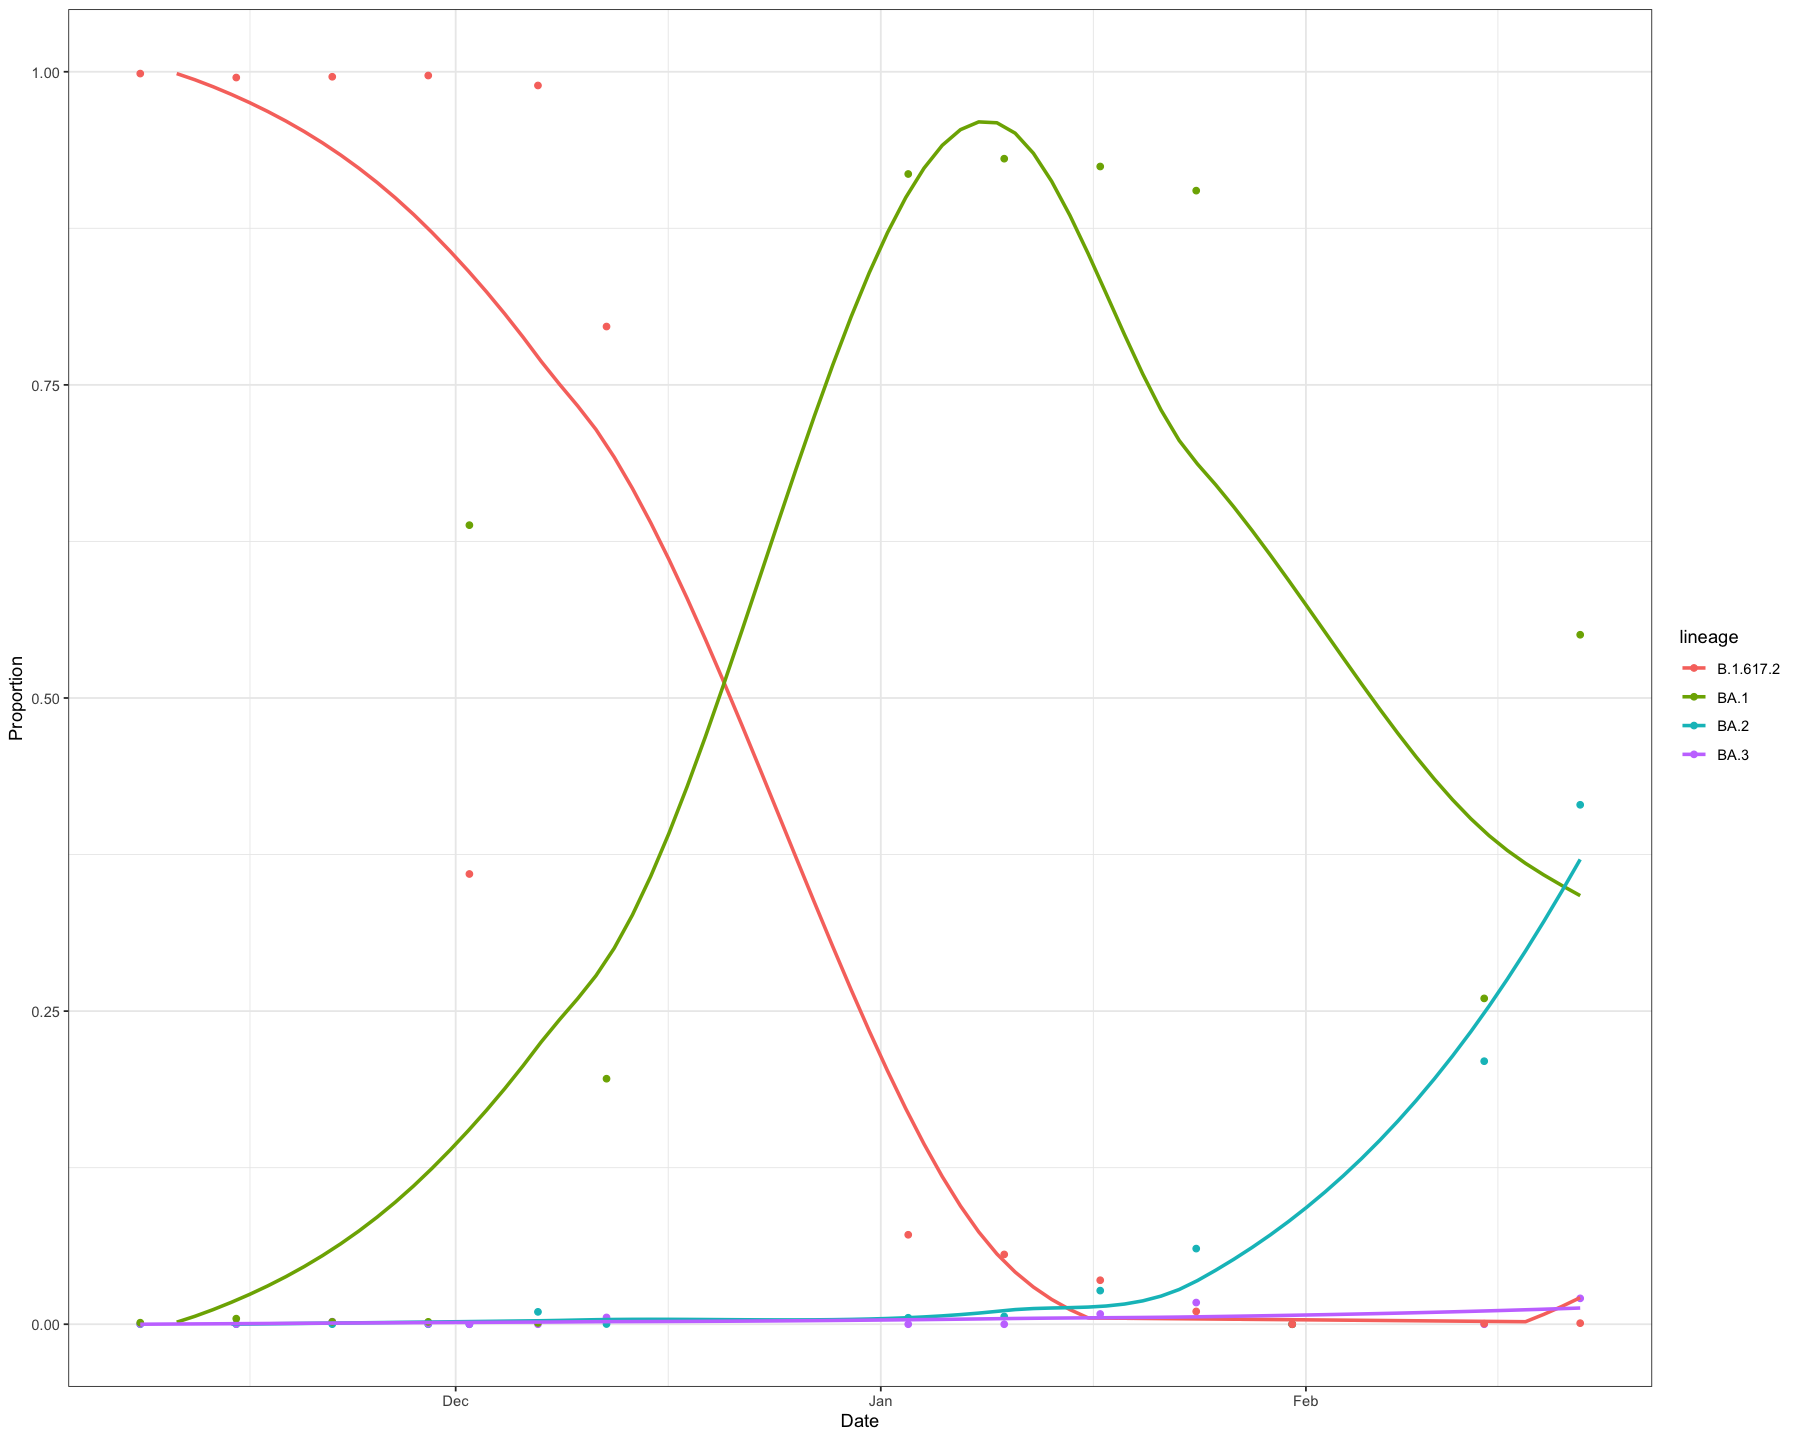

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
